<a href="https://colab.research.google.com/github/vandyahmad24/python_deeplearning/blob/master/New_4_Layer_Epcoh_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install Augmentor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# **Copy file dari hasil potong ke folder test dan train**

In [3]:
#!cp drive/My\ Drive/hasil_training_mobil/Panther/* drive/My\ Drive/dataset_training/test/panther
#!cp drive/My\ Drive/hasil_training_mobil/Carry/* drive/My\ Drive/dataset_training/test/carry
#!cp drive/My\ Drive/hasil_training_mobil/Kijang/* drive/My\ Drive/dataset_training/test/kijang

#!cp drive/My\ Drive/hasil_training_mobil/Panther/* drive/My\ Drive/dataset_training/train/panther
#!cp drive/My\ Drive/hasil_training_mobil/Carry/* drive/My\ Drive/dataset_training/train/carry
#!cp drive/My\ Drive/hasil_training_mobil/Kijang/* drive/My\ Drive/dataset_training/train/kijang


In [4]:
import Augmentor
import os

def perbanyak_(ini, sebanyak_ini):
  source_dir = ini
  output_dir = "."
  p = Augmentor.Pipeline(source_directory=source_dir, output_directory=output_dir)
  p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=1)
  p.rotate(probability=0.7, max_left_rotation=13, max_right_rotation=13)
  p.zoom_random(probability=0.5, percentage_area=0.9)
  p.crop_random(probability=0.6, percentage_area=0.9)
  p.resize(probability=1.0, width=64, height=64)

  p.sample(sebanyak_ini)

#sampel
#perbanyak_("dataset/test/5", 30)
#perbanyak_("dataset/test/s", 30)
#perbanyak_("dataset/train/5", 270)
#perbanyak_("dataset/train/s", 270)

#perbanyak_("drive/My Drive/dataset_training/test/carry", 700)
#perbanyak_("drive/My Drive/dataset_training/test/panther", 700)
#perbanyak_("drive/My Drive/dataset_training/test/kijang", 700)
#perbanyak_("drive/My Drive/dataset_training/train/carry", 1500)
#perbanyak_("drive/My Drive/dataset_training/train/panther", 1500)
#perbanyak_("drive/My Drive/dataset_training/train/kijang", 1500)


# **Hitung jumlah data **

In [5]:
import glob
panther_test = glob.glob("drive/My Drive/dataset_training/test/panther/*.jpg")
print("panther test",len(panther_test))
carry_test = glob.glob("drive/My Drive/dataset_training/test/carry/*.jpg")
print("carry_test",len(carry_test))
kijang_test = glob.glob("drive/My Drive/dataset_training/test/kijang/*.jpg")
print("kijang_test",len(kijang_test))

panther_train = glob.glob("drive/My Drive/dataset_training/train/panther/*.jpg")
carry_train = glob.glob("drive/My Drive/dataset_training/train/carry/*.jpg")
kijang_train = glob.glob("drive/My Drive/dataset_training/train/kijang/*.jpg")
print("agna_train",len(panther_train))
print("carry_train",len(carry_train))
print("inova_train",len(kijang_train))

panther test 708
carry_test 714
kijang_test 714
agna_train 1508
carry_train 1514
inova_train 1514


In [6]:
import glob
import matplotlib.pyplot as plt
#%matplotlib inline

def tampilkan_6_kali_5_gambar_pada_alamat(ini):
  a = glob.glob(ini)

  w=10
  h=10
  fig=plt.figure(figsize=(8, 8))
  columns = 6
  rows = 5
  for i in range(1, columns*rows +1):
      img = plt.imread(a[i])
      fig.add_subplot(rows, columns, i)
      plt.imshow(img)
  plt.show()


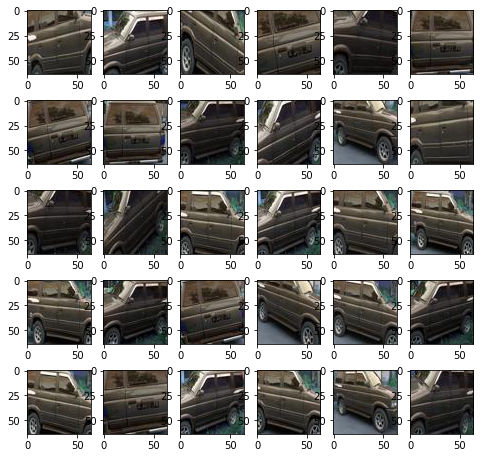

In [7]:
tampilkan_6_kali_5_gambar_pada_alamat("drive/My Drive/dataset_training/train/panther/*")

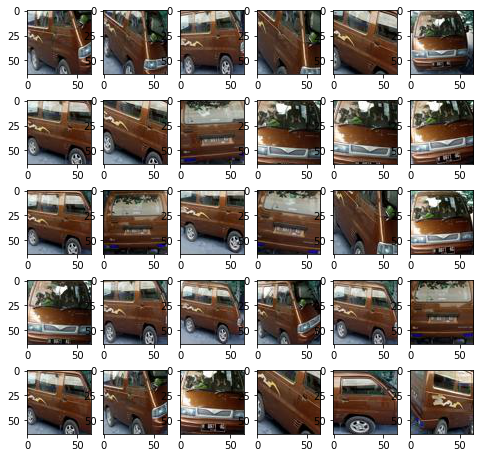

In [8]:
tampilkan_6_kali_5_gambar_pada_alamat("drive/My Drive/dataset_training/train/carry/*")

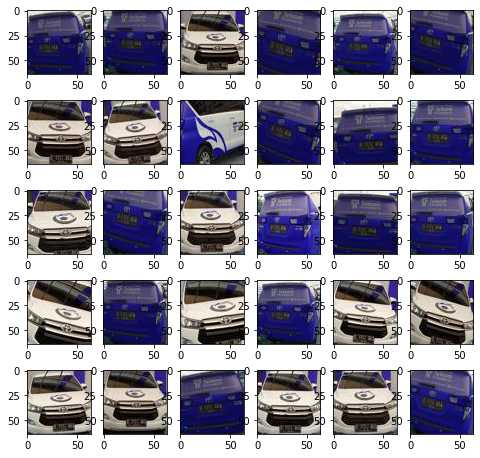

In [9]:
tampilkan_6_kali_5_gambar_pada_alamat("drive/My Drive/dataset_training/train/kijang/*")

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_accuracy

size_ = 64

model = Sequential()
#menghitung input size : 

#-------------------------------------------------------------------------------------------
model.add(Conv2D(256, (3, 3), input_shape = (size_, size_, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
#-------------------------------------------------------------------------------------------
model.add(Conv2D(128, (3, 3), input_shape = (31, 31, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
#-------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------
model.add(Conv2D(64, (3, 3), input_shape = (15, 15, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
#-------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------
model.add(Conv2D(32, (3, 3), input_shape = (7, 7, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
#------------------------------------------------------------------------------------------- digunakan untuk mengubah matrik menjadi panjang 1
model.add(Flatten())

model.add(Dense(units = 10, activation = 'relu'))
#model.add(Dense(units = 500, activation = 'relu'))
#konvolusi 32,64,128
#-------------------------------------------------------------------------------------------

model.add(Dense(units = 3, activation = 'softmax'))

# model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = [categorical_accuracy])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 32)          1

In [12]:
train = ImageDataGenerator(rescale = 1./255)
test = ImageDataGenerator(rescale = 1./255)
train_data = train.flow_from_directory('drive/My Drive/dataset_training/train', target_size = (size_, size_), batch_size = 32, class_mode = 'categorical')
test_data = test.flow_from_directory('drive/My Drive/dataset_training/test', target_size = (size_, size_), batch_size = 32, class_mode = 'categorical')

Found 4536 images belonging to 3 classes.
Found 2136 images belonging to 3 classes.


In [13]:
!rm -rf "drive/My Drive/dataset_training/test/.ipynb_checkpoints"

In [14]:
model.fit_generator(train_data, steps_per_epoch = 100, epochs = 50, validation_data = test_data, validation_steps = 100)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
100/100 [==============================] - 1106s 11s/step - loss: 1.0841 - categorical_accuracy: 0.3524 - val_loss: 1.0590 - val_categorical_accuracy: 0.3614
Epoch 2/50
100/100 [==============================] - 192s 2s/step - loss: 1.0156 - categorical_accuracy: 0.5586
Epoch 3/50
100/100 [==============================] - 134s 1s/step - loss: 0.7162 - categorical_accuracy: 0.8900
Epoch 4/50
100/100 [==============================] - 138s 1s/step - loss: 0.2373 - categorical_accuracy: 0.9550
Epoch 5/50
100/100 [==============================] - 134s 1s/step - loss: 0.0289 - categorical_accuracy: 0.9997
Epoch 6/50
100/100 [==============================] - 133s 1s/step - loss: 0.0112 - categorical_accuracy: 1.0000
Epoch 7/50
100/100 [==============================] - 134s 1s/step - loss: 0.0063 - categorical_accuracy: 1.0000
Epoch 8/50
100/100 [==============================] - 134s 1s/step - loss: 0.

In [15]:
model.save_weights("New3layer8conv32_16_dan_6size.h5")

In [16]:
#a = "drive/My Drive/dataset_training/test/agna/file_11.jpg"
import glob
panther = glob.glob("drive/My Drive/dataset_training/test/panther/*.jpg")
carry = glob.glob("drive/My Drive/dataset_training/test/carry/*.jpg")
kijang = glob.glob("drive/My Drive/dataset_training/test/kijang/*.jpg")
jumlah_dataset_panther = len(panther)
jumlah_dataset_carry = len(carry)
jumlah_dataset_kijang = len(kijang)


  

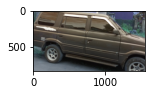

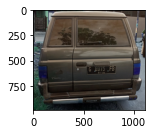

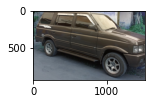

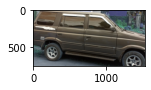

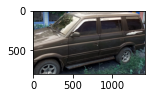

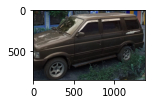

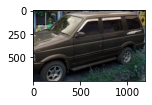

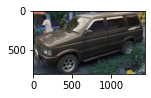

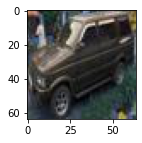

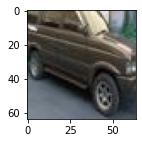

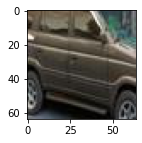

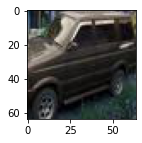

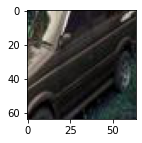

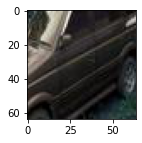

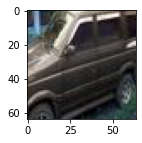

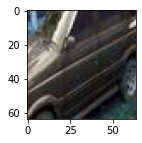

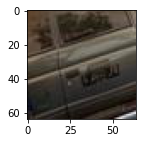

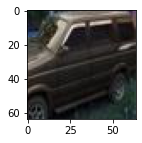

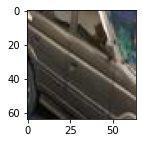

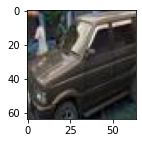

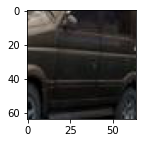

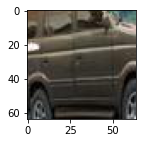

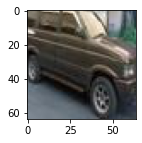

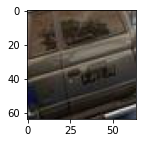

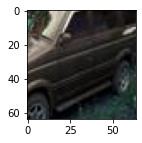

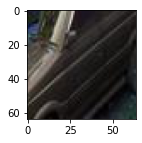

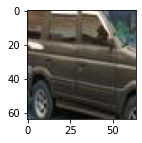

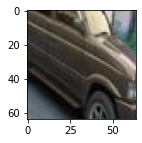

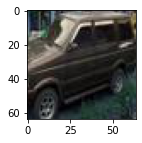

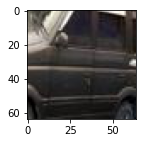

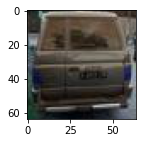

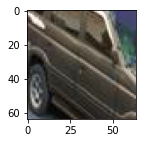

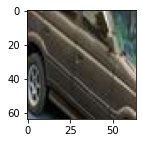

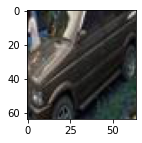

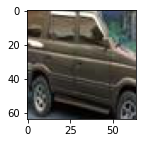

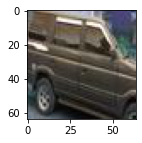

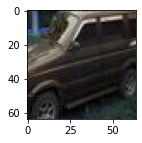

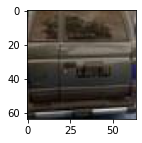

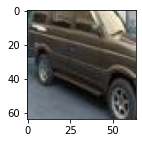

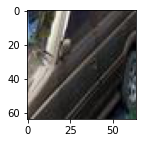

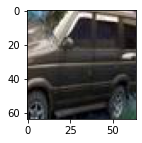

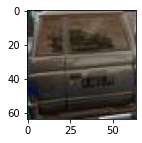

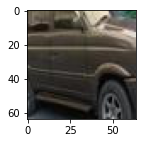

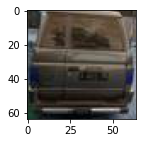

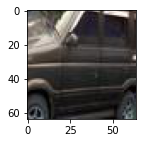

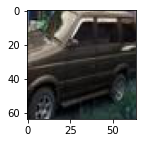

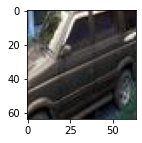

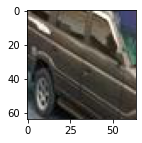

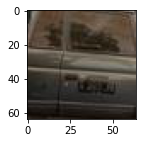

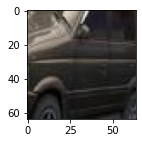

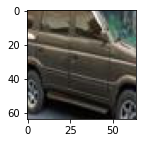

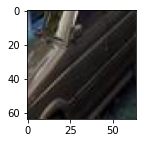

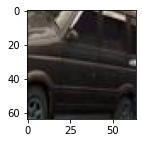

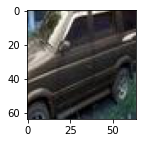

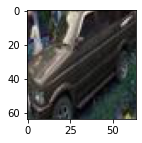

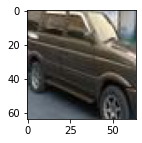

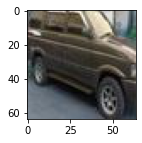

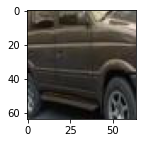

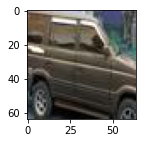

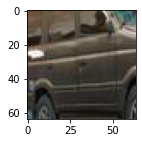

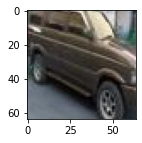

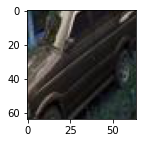

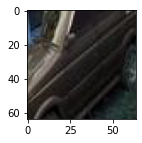

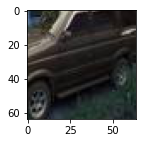

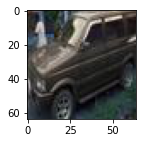

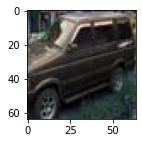

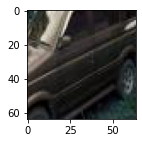

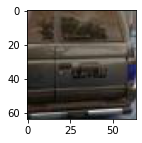

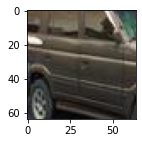

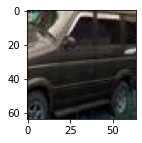

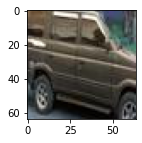

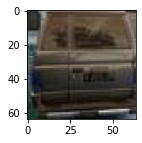

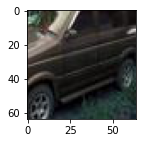

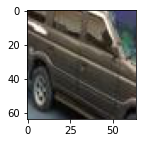

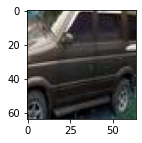

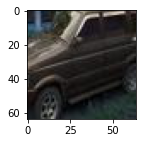

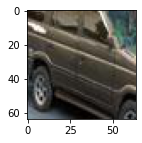

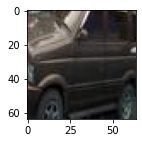

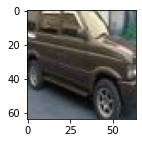

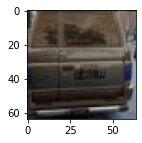

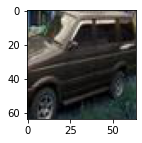

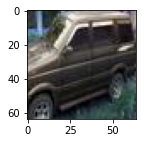

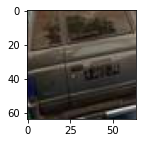

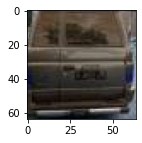

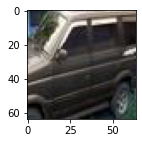

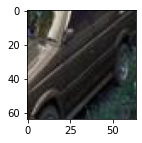

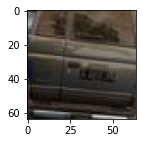

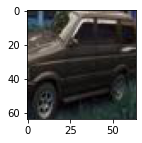

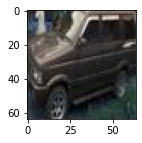

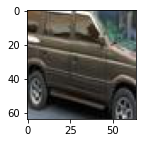

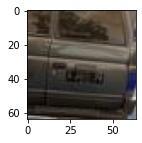

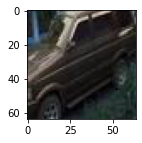

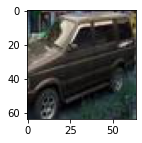

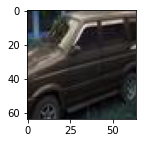

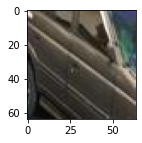

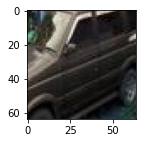

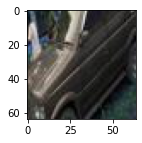

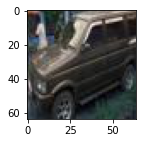

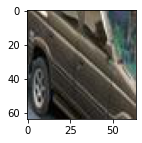

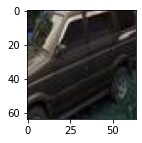

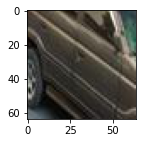

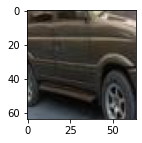

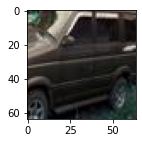

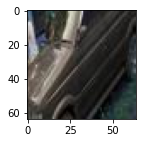

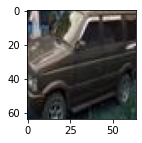

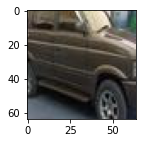

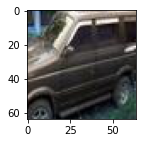

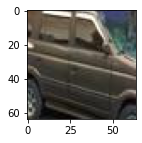

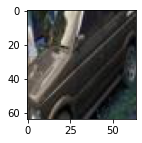

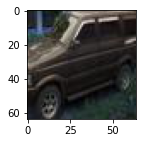

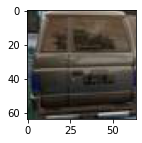

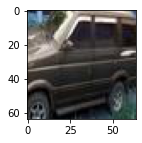

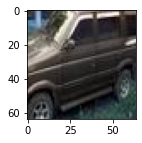

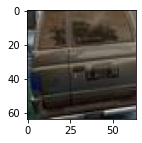

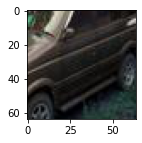

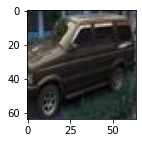

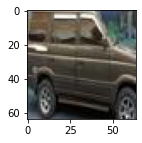

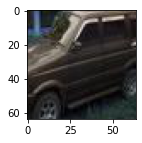

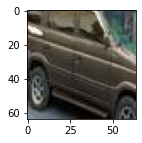

KeyboardInterrupt: ignored

In [17]:
# def tampilkan_(ini):
#   fig = plt.figure(figsize=(2, 2))
#   img = plt.imread(ini)
#   plt.imshow(img)
#   plt.show()

# #tampilkan_(a)
# for i in range(jumlah_dataset_panther):
#   tampilkan_(panther[i])


In [18]:
def switch_dict_key_values(this_dict):
    return dict((v,k) for k,v in this_dict.items())

nama_train_data = switch_dict_key_values(train_data.class_indices)
print(nama_train_data)

{0: 'carry', 1: 'kijang', 2: 'panther'}


In [19]:
from keras.preprocessing import image
import numpy as np
#carry
total_carry = 0
for i in range(jumlah_dataset_carry):
  #print(carry[i])
  img = image.load_img(carry[i], target_size = (size_, size_))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)

  hasil = model.predict_classes(img)
  #print(hasil)
  print("File gambar [", carry[i], "] diprediksi sebagai", hasil, "alias terbaca sebagai :: ", nama_train_data[hasil[0]], ".")
  total_carry += (0 == hasil[0])*1
print(total_carry/int(jumlah_dataset_carry))


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
File gambar [ drive/My Drive/dataset_training/test/carry/carry_0.jpg ] diprediksi sebagai [0] alias terbaca sebagai ::  carry .
File gambar [ drive/My Drive/dataset_training/test/carry/carry_10.jpg ] diprediksi sebagai [0] alias terbaca sebagai ::  carry .
File gambar [ drive/My Drive/dataset_training/test/carry/carry_12.jpg ] diprediksi sebagai [0] alias terbaca sebagai ::  carry .
File gambar [ drive/My Drive/dataset_training/test/carry/carry_15.jpg ] diprediksi sebagai [0] alias terbaca sebagai ::  carry .
File gambar [ drive/My Drive/dataset_training/test/carry/carry_17.jpg ] diprediksi sebagai [0] alias terbaca sebagai ::  carry .
File gambar [ drive/My

In [20]:
#kijang
total_kijang = 0
for i in range(jumlah_dataset_kijang):
  img = image.load_img(kijang[i], target_size = (size_, size_))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)

  hasil = model.predict_classes(img)
  print("File gambar [", kijang[i], "] diprediksi sebagai", hasil, "alias terbaca sebagai :: ", nama_train_data[hasil[0]], ".")
  total_kijang += (1 == hasil[0])*1
print(total_kijang/int(jumlah_dataset_kijang))
  


File gambar [ drive/My Drive/dataset_training/test/kijang/kijang_0.jpg ] diprediksi sebagai [1] alias terbaca sebagai ::  kijang .
File gambar [ drive/My Drive/dataset_training/test/kijang/kijang_14.jpg ] diprediksi sebagai [1] alias terbaca sebagai ::  kijang .
File gambar [ drive/My Drive/dataset_training/test/kijang/kijang_17.jpg ] diprediksi sebagai [1] alias terbaca sebagai ::  kijang .
File gambar [ drive/My Drive/dataset_training/test/kijang/kijang_18.jpg ] diprediksi sebagai [1] alias terbaca sebagai ::  kijang .
File gambar [ drive/My Drive/dataset_training/test/kijang/kijang_19.jpg ] diprediksi sebagai [1] alias terbaca sebagai ::  kijang .
File gambar [ drive/My Drive/dataset_training/test/kijang/kijang_1.jpg ] diprediksi sebagai [1] alias terbaca sebagai ::  kijang .
File gambar [ drive/My Drive/dataset_training/test/kijang/kijang_20.jpg ] diprediksi sebagai [1] alias terbaca sebagai ::  kijang .
File gambar [ drive/My Drive/dataset_training/test/kijang/kijang_24.jpg ] dipr

In [21]:
#panther
total_panther = 0
for i in range(jumlah_dataset_panther):
  img = image.load_img(panther[i], target_size = (size_, size_))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)

  hasil = model.predict_classes(img)
  print("File gambar [", panther[i], "] diprediksi sebagai", hasil, "alias terbaca sebagai :: ", nama_train_data[hasil[0]], ".")
  total_panther += (1 == hasil[0])*1
print(total_panther/int(jumlah_dataset_panther))
print(total_panther)
  


File gambar [ drive/My Drive/dataset_training/test/panther/panther_0.jpg ] diprediksi sebagai [1] alias terbaca sebagai ::  kijang .
File gambar [ drive/My Drive/dataset_training/test/panther/panther_13.jpg ] diprediksi sebagai [1] alias terbaca sebagai ::  kijang .
File gambar [ drive/My Drive/dataset_training/test/panther/panther_1.jpg ] diprediksi sebagai [1] alias terbaca sebagai ::  kijang .
File gambar [ drive/My Drive/dataset_training/test/panther/panther_2.jpg ] diprediksi sebagai [1] alias terbaca sebagai ::  kijang .
File gambar [ drive/My Drive/dataset_training/test/panther/panther_6.jpg ] diprediksi sebagai [1] alias terbaca sebagai ::  kijang .
File gambar [ drive/My Drive/dataset_training/test/panther/panther_7.jpg ] diprediksi sebagai [1] alias terbaca sebagai ::  kijang .
File gambar [ drive/My Drive/dataset_training/test/panther/panther_8.jpg ] diprediksi sebagai [1] alias terbaca sebagai ::  kijang .
File gambar [ drive/My Drive/dataset_training/test/panther/panther_9